In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
data = pd.read_csv("exams1.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,math_score,reading_score,writing_score,test preparation course
0,female,group D,some college,standard,59.0,70.0,78.0,completed
1,male,group D,associate's degree,standard,96.0,93.0,87.0,none
2,female,group D,some college,free/reduced,NaN,76.0,77.0,none
3,male,group B,some college,free/reduced,70.0,70.0,63.0,none
4,female,group D,associate's degree,standard,83.0,85.0,NaN,none


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   math_score                   998 non-null    float64
 5   reading_score                999 non-null    float64
 6   writing_score                999 non-null    float64
 7   test preparation course      1000 non-null   object 
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [48]:
data['race/ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)

In [49]:
lunchform = 'free/reduced'
data[data['lunch']==lunchform]

,gender,race/ethnicity,parental level of education,lunch,math_score,reading_score,writing_score,test preparation course
2,female,group D,some college,free/reduced,NaN,76.0,77.0,none
3,male,group B,some college,free/reduced,70.0,70.0,63.0,none
12,male,group B,bachelor's degree,free/reduced,76.0,74.0,76.0,none
14,male,group C,master's degree,free/reduced,55.0,54.0,52.0,none
15,male,group E,master's degree,free/reduced,56.0,46.0,43.0,none
...,...,...,...,...,...,...,...,...
970,female,group C,high school,free/reduced,48.0,60.0,55.0,none
975,male,group E,some high school,free/reduced,47.0,54.0,48.0,none
977,male,group B,bachelor's degree,free/reduced,55.0,59.0,49.0,none
985,female,group A,bachelor's degree,free/reduced,65.0,64.0,73.0,none


untuk menampilkan math score dengan mencari rata-rata(mean) dan juga nilai tengah(median) tiap *level of education*

In [50]:
unique_mathsc = data[data.math_score>70]['parental level of education'].unique()
unique_mathsc.sort()
unique_mathsc

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

In [51]:
math_score_mean = []
for i in unique_mathsc:
  math_score_mean.append(data[data.math_score>0][data['parental level of education']==i][data['lunch']==lunchform].math_score.mean())

<ipython-input-51-77cd38f5855f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math_score_mean.append(data[data.math_score>0][data['parental level of education']==i][data['lunch']==lunchform].math_score.mean())


In [52]:
print(set(zip(unique_mathsc, math_score_mean)))

{("bachelor's degree", 62.5945945945946), ("associate's degree", 62.647887323943664), ('high school', 57.30379746835443), ("master's degree", 67.6), ('some high school', 53.9622641509434), ('some college', 60.10958904109589)}


In [53]:
math_score_med = []
for i in unique_mathsc:
  math_score_med.append(data[data.math_score>0][data['parental level of education']==i][data['lunch']==lunchform].math_score.median())

<ipython-input-53-ec5ba70604c2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math_score_med.append(data[data.math_score>0][data['parental level of education']==i][data['lunch']==lunchform].math_score.median())
<ipython-input-53-ec5ba70604c2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math_score_med.append(data[data.math_score>0][data['parental level of education']==i][data['lunch']==lunchform].math_score.median())
<ipython-input-53-ec5ba70604c2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math_score_med.append(data[data.math_score>0][data['parental level of education']==i][data['lunch']==lunchform].math_score.median())
<ipython-input-53-ec5ba70604c2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math_score_med.append(data[data.math_score>0][data['parental level of education']==i][data['lunch']==lunchform].math_score.median())
<ipython-input-5

In [54]:
print(set(zip(unique_mathsc, math_score_med)))

{('high school', 59.0), ('some college', 62.0), ('some high school', 58.0), ("associate's degree", 62.0), ("master's degree", 71.0), ("bachelor's degree", 63.0)}


*untuk perbandingan reading score > 70 dengan writing score > 99*

In [55]:
unique_readsc = data[data.reading_score>70]['parental level of education'].unique()
unique_readsc.sort()
unique_readsc

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

untuk writing score > 99 hanya menampilkan 5 level education, sementara reading > 70 menampilkan 6

In [56]:
unique_writesc = data[data.writing_score>99]['parental level of education'].unique()
unique_writesc.sort()
unique_writesc

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college'], dtype=object)

In [57]:
read_score_mean = []
for i in unique_readsc:
  read_score_mean.append(data[data.reading_score>0][data['parental level of education']==i][data['lunch']==lunchform].reading_score.mean())

<ipython-input-57-1112b22717c0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  read_score_mean.append(data[data.reading_score>0][data['parental level of education']==i][data['lunch']==lunchform].reading_score.mean())


In [58]:
write_score_mean = []
for i in unique_writesc:
  write_score_mean.append(data[data.writing_score>0][data['parental level of education']==i][data['lunch']==lunchform].writing_score.mean())

<ipython-input-58-cdf30728c6a6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  write_score_mean.append(data[data.writing_score>0][data['parental level of education']==i][data['lunch']==lunchform].writing_score.mean())


untuk perbandingan mean yang dihitung pada writing score (menampilkan 5 level education) dengan reading score (menampilkan 6 level education)

In [59]:
print(set(zip(unique_writesc, write_score_mean)))

{("master's degree", 68.08), ('high school', 62.22784810126582), ('some college', 63.945945945945944), ("associate's degree", 67.06944444444444), ("bachelor's degree", 66.5945945945946)}


In [60]:
print(set(zip(unique_readsc, read_score_mean)))

{("bachelor's degree", 67.56756756756756), ('high school', 64.92405063291139), ("master's degree", 68.32), ("associate's degree", 67.30555555555556), ('some high school', 62.132075471698116), ('some college', 65.43243243243244)}


In [61]:
nan_indices = []
for i in range(len(unique_mathsc)):
  if type(unique_mathsc[i])==float:
    nan_indices.append(i)

In [62]:
unique_mathsc = list(unique_mathsc)
math_score_med = list(math_score_med)

In [63]:
for i in nan_indices:
  unique_mathsc.pop(i)
  math_score_med.pop(i)

unique_mathsc

["associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school']

untuk menampilkan grafik nilai tengah (median) dari math score

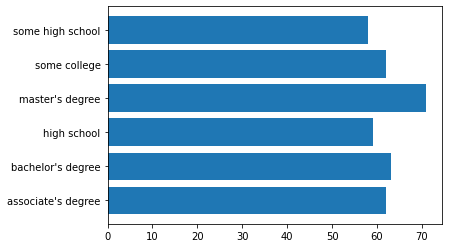

In [65]:
plt.barh(unique_mathsc, math_score_med)
plt.show()

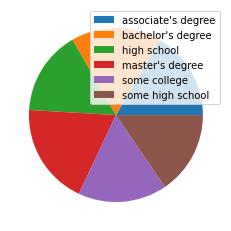

In [66]:
plt.pie(math_score_med)
plt.legend(unique_mathsc, loc='best')
plt.show()

untuk membuat grafik dari rata-rata yang diperoleh tiap level of education dari writing score.

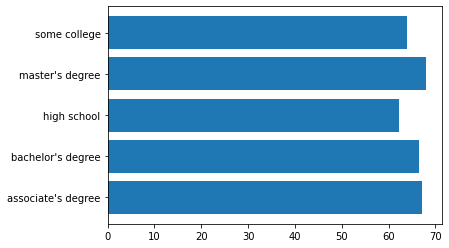

In [73]:
plt.barh(unique_writesc, write_score_mean)
plt.show()

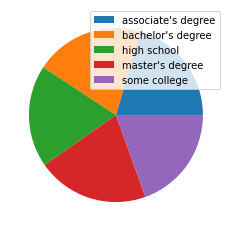

In [71]:
plt.pie(write_score_mean)
plt.legend(unique_writesc, loc='best')
plt.show()

untuk membuat grafik dari rata-rata(mean) read score

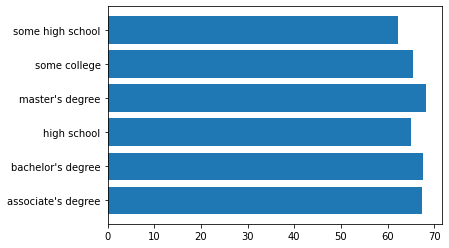

In [72]:
plt.barh(unique_readsc, read_score_mean)
plt.show()

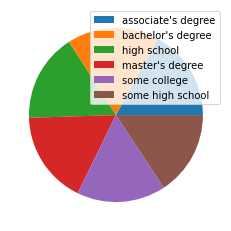

In [70]:
plt.pie(read_score_mean)
plt.legend(unique_readsc, loc='best')
plt.show()